In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from read_roi import read_roi_zip
import untangle
from sklearn.cluster import KMeans
from utils.MastodonFunctions import xml_features, csv_features, ordering_tracks, smoothing_filter, peak_detection, bulk_peak_analysis

# Figure S1: In vivo Her 1 data

## More extensive analysis on TB cells

Cells were tracked from the TB in the same embryo used for the above analysis. These cells will help in order to give a more detailed analysis of how the TB cells oscillate in the embryo.

### Import Data

There are 3 Embryos at ~15 somite stage which were imaged during 2 different experimental days. They were all our Looping transgenic (to mark the expression of Her1 protein) with a Histone mCherry marker to be able to track the nuclei. From these embryos, we here will show cells which were tracked starting at the TB and followed to (1) several different somites, (2) to the PSMd area and (3) through the TB (these cells did not leave the TB as far as the tracking was going). 

- **20191213-Position2:** 
    - 18 cells TB to Somites
    - 16 cells TB to PSMd
    - 1 cell TB to TB
- **20191213-Position1:**
    - 10 cells TB to Somites
    - 1 cell TB to PSMd
    - 2 cells TB to TB
- **20190513-Position2:** 
    - 7 TB to Somites
    - 4 TB to PSMd
    - 6 TB to TB

In [2]:
# Path to the .xml file
path_xml_20191213_Pos2 = '../Data/Figure S1/Position2_20191213.xml' # Path to .xml file
path_xml_20191213_Pos1 = '../Data/Figure S1/Position1_20191213.xml' # Path to .xml file

# Path to the -edges.csv amd -vertices.csv files (You only need path + name of file without the -edges or -vertices extension)
path_csv_20191213_Pos2_TBtoTB = '../Data/Figure S1/20191213-Position2-TBtoTB' 
path_csv_20191213_Pos2_TBtoSom = '../Data/Figure S1/20191213-Position2-TBtoSom'
path_csv_20191213_Pos2_TBtoPSMd = '../Data/Figure S1/20191213-Position2-TBtoPSMd'

path_csv_20191213_Pos1_TBtoTB = '../Data/Figure S1/20191213-Position1-TBtoTB' 
path_csv_20191213_Pos1_TBtoSom = '../Data/Figure S1/20191213-Position1-TBtoSom'
path_csv_20191213_Pos1_TBtoPSMd = '../Data/Figure S1/20191213-Position1-TBtoPSMd'

### Image Characteristics

Becuase the acquisition settings where the same for the 2 embryos in the same experiment (20191213 - Positions 1 and 2), we will use only one .xml file to obtain the pixel and image features. 

In [3]:
# Time resolution in seconds (how often do you acquire time points)
tr = 90

fts = xml_features(path_xml_20191213_Pos2)

# Features from the image obtained from the .xml generated by BigData Viewer
print('The image has the following dimensions (XYZC): %d, %d, %d, %d'%(fts.width, fts.height, fts.n_slices, fts.channels))
print('There are %d frames in total.'%fts.n_frames)
print('Pixel Size: x = %.3g %s, y = %.3g %s z = %.2g %s'%(fts.x_pixel, fts.units, fts.y_pixel, fts.units, fts.z_pixel, fts.units))
print('There are %d Z-slices in total'%fts.n_slices)

The image has the following dimensions (XYZC): 2048, 2048, 150, 2
There are 299 frames in total.
Pixel Size: x = 0.347 micron, y = 0.347 micron z = 1.5 micron
There are 150 Z-slices in total


### Re-arrange the data to obtain the single cell tracks

In [4]:
spots_Pos1_TBtoTB = csv_features(path_csv_20191213_Pos1_TBtoTB, path_xml_20191213_Pos1)
spots_Pos1_TBtoSom = csv_features(path_csv_20191213_Pos1_TBtoSom, path_xml_20191213_Pos1)
spots_Pos1_TBtoPSMd = csv_features(path_csv_20191213_Pos1_TBtoPSMd, path_xml_20191213_Pos1)

spots_Pos2_TBtoTB = csv_features(path_csv_20191213_Pos2_TBtoTB, path_xml_20191213_Pos2)
spots_Pos2_TBtoSom = csv_features(path_csv_20191213_Pos2_TBtoSom, path_xml_20191213_Pos2)
spots_Pos2_TBtoPSMd = csv_features(path_csv_20191213_Pos2_TBtoPSMd, path_xml_20191213_Pos2)

tracks_Pos1_TBtoTB = ordering_tracks(path_csv_20191213_Pos1_TBtoTB, path_xml_20191213_Pos1)
tracks_Pos1_TBtoSom = ordering_tracks(path_csv_20191213_Pos1_TBtoSom, path_xml_20191213_Pos1)
tracks_Pos1_TBtoPSMd = ordering_tracks(path_csv_20191213_Pos1_TBtoPSMd, path_xml_20191213_Pos1)

tracks_Pos2_TBtoTB = ordering_tracks(path_csv_20191213_Pos2_TBtoTB, path_xml_20191213_Pos2)
tracks_Pos2_TBtoSom = ordering_tracks(path_csv_20191213_Pos2_TBtoSom, path_xml_20191213_Pos2)
tracks_Pos2_TBtoPSMd = ordering_tracks(path_csv_20191213_Pos2_TBtoPSMd, path_xml_20191213_Pos2)

There are no Tags.
There are no Tags.


### Plot the raw intensity tracks

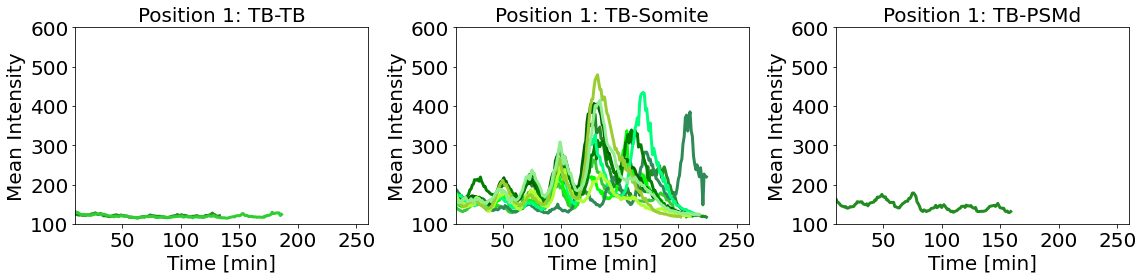

In [5]:
colors_green = ['forestgreen', 'limegreen', 'lime', 'seagreen', 'darkgreen', 'green', 'springgreen', 'greenyellow', 'yellowgreen', 'lightgreen']*10

# Position 1
plt.figure(figsize=[16,4])

plt.subplot(131)
for j in range(tracks_Pos1_TBtoTB.n_tracks_divs):
    tr_min = round(tr/60,2)
    plt.plot(tracks_Pos1_TBtoTB.spots_features['Frames'][j], tracks_Pos1_TBtoTB.spots_features['Mean1'][j], \
             linewidth=3, color=colors_green[j])

plt.xlabel('Time [min]', fontsize=20)
locs, labels = plt.xticks()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Mean Intensity', fontsize=20)
plt.title('Position 1: TB-TB', fontsize=20)
plt.xlim([10,260])
plt.ylim([100, 600])

plt.subplot(132)
for j in range(tracks_Pos1_TBtoSom.n_tracks_divs):
    tr_min = round(tr/60,2)
    plt.plot(tracks_Pos1_TBtoSom.spots_features['Frames'][j], tracks_Pos1_TBtoSom.spots_features['Mean1'][j], \
             linewidth=3, color=colors_green[j])

plt.xlabel('Time [min]', fontsize=20)
locs, labels = plt.xticks()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Mean Intensity', fontsize=20)
plt.title('Position 1: TB-Somite', fontsize=20)
plt.xlim([10,260])
plt.ylim([100, 600])

plt.subplot(133)
for j in range(tracks_Pos1_TBtoPSMd.n_tracks_divs):
    tr_min = round(tr/60,2)
    plt.plot(tracks_Pos1_TBtoPSMd.spots_features['Frames'][j], tracks_Pos1_TBtoPSMd.spots_features['Mean1'][j], \
             linewidth=3, color=colors_green[j])

plt.xlabel('Time [min]', fontsize=20)
locs, labels = plt.xticks()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Mean Intensity', fontsize=20)
plt.title('Position 1: TB-PSMd', fontsize=20)
plt.xlim([10,260])
plt.ylim([100, 600])

plt.tight_layout()
plt.show()

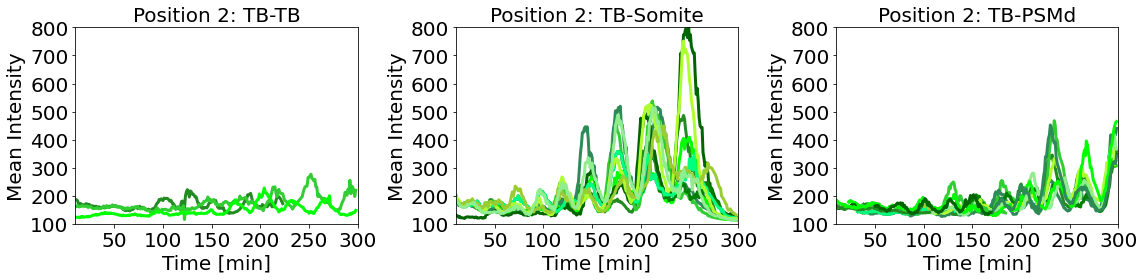

In [6]:
colors_green = ['forestgreen', 'limegreen', 'lime', 'seagreen', 'darkgreen', 'green', 'springgreen', 'greenyellow', 'yellowgreen', 'lightgreen']*10

# Position 2
plt.figure(figsize=[16,4])

plt.subplot(131)
for j in range(tracks_Pos2_TBtoTB.n_tracks_divs):
    tr_min = round(tr/60,2)
    plt.plot(tracks_Pos2_TBtoTB.spots_features['Frames'][j], tracks_Pos2_TBtoTB.spots_features['Mean1'][j], \
             linewidth=3, color=colors_green[j])

plt.xlabel('Time [min]', fontsize=20)
locs, labels = plt.xticks()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Mean Intensity', fontsize=20)
plt.title('Position 2: TB-TB', fontsize=20)
plt.xlim([10,300])
plt.ylim([100, 800])

plt.subplot(132)
for j in range(tracks_Pos2_TBtoSom.n_tracks_divs):
    tr_min = round(tr/60,2)
    plt.plot(tracks_Pos2_TBtoSom.spots_features['Frames'][j], tracks_Pos2_TBtoSom.spots_features['Mean1'][j], \
             linewidth=3, color=colors_green[j])

plt.xlabel('Time [min]', fontsize=20)
locs, labels = plt.xticks()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Mean Intensity', fontsize=20)
plt.title('Position 2: TB-Somite', fontsize=20)
plt.xlim([10,300])
plt.ylim([100, 800])

plt.subplot(133)
for j in range(tracks_Pos2_TBtoPSMd.n_tracks_divs):
    tr_min = round(tr/60,2)
    plt.plot(tracks_Pos2_TBtoPSMd.spots_features['Frames'][j], tracks_Pos2_TBtoPSMd.spots_features['Mean1'][j], \
             linewidth=3, color=colors_green[j])

plt.xlabel('Time [min]', fontsize=20)
locs, labels = plt.xticks()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Mean Intensity', fontsize=20)
plt.title('Position 2: TB-PSMd', fontsize=20)
plt.xlim([10,300])
plt.ylim([100, 800])

plt.tight_layout()
plt.show()

## Group experiments

In [7]:
TBtoTB_traces = []
TBtoTB_frames = []

TBtoSom_traces = []
TBtoSom_frames = []

TBtoPSMd_traces = []
TBtoPSMd_frames = []

In [8]:
for j in range(tracks_Pos1_TBtoTB.n_tracks_divs):   
    TBtoTB_frames.append(tracks_Pos1_TBtoTB.spots_features['Frames'][j])
    TBtoTB_traces.append(tracks_Pos1_TBtoTB.spots_features['Mean1'][j])

for j in range(tracks_Pos2_TBtoTB.n_tracks_divs):   
    TBtoTB_frames.append(tracks_Pos2_TBtoTB.spots_features['Frames'][j])
    TBtoTB_traces.append(tracks_Pos2_TBtoTB.spots_features['Mean1'][j])

In [9]:
for j in range(tracks_Pos1_TBtoSom.n_tracks_divs):   
    TBtoSom_frames.append(tracks_Pos1_TBtoSom.spots_features['Frames'][j])
    TBtoSom_traces.append(tracks_Pos1_TBtoSom.spots_features['Mean1'][j])

for j in range(tracks_Pos2_TBtoSom.n_tracks_divs):   
    TBtoSom_frames.append(tracks_Pos2_TBtoSom.spots_features['Frames'][j])
    TBtoSom_traces.append(tracks_Pos2_TBtoSom.spots_features['Mean1'][j])

In [10]:
for j in range(tracks_Pos1_TBtoPSMd.n_tracks_divs):   
    TBtoPSMd_frames.append(tracks_Pos1_TBtoPSMd.spots_features['Frames'][j])
    TBtoPSMd_traces.append(tracks_Pos1_TBtoPSMd.spots_features['Mean1'][j])

for j in range(tracks_Pos2_TBtoPSMd.n_tracks_divs):   
    TBtoPSMd_frames.append(tracks_Pos2_TBtoPSMd.spots_features['Frames'][j])
    TBtoPSMd_traces.append(tracks_Pos2_TBtoPSMd.spots_features['Mean1'][j])

### Plot the results

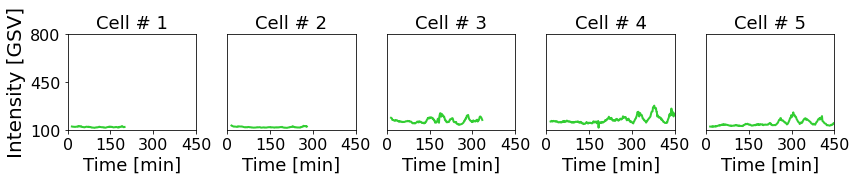

In [41]:
# Define the dimensions of the subplot
n_cols =  5
n_cells = len(TBtoTB_frames)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1
size_fig = n_rows*(10/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[12,size_fig])

for i in range(len(TBtoTB_frames)):
    
    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
    

    plt.plot(TBtoTB_frames[i], TBtoTB_traces[i], color='limegreen', linewidth=2)
    plt.title('Cell # %d'%(i+1), fontsize = 18)
    
    plt.xticks(np.arange(0,400,100), map(int,np.arange(0,400,100)*tr_min), fontsize=16)
    plt.xlabel('Time [min]', fontsize=18)
    if i ==0:
        plt.yticks(np.arange(100,950,350), fontsize=16)
        plt.ylabel('Intensity [GSV]', fontsize=20)
    else:
        plt.yticks([])
        
    plt.xlim([0,300])
    plt.ylim([100,800])

plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S1/Results/TB-TB-allcells.pdf', bbox_inches='tight')

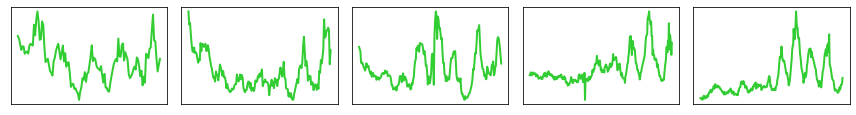

In [31]:
# Define the dimensions of the subplot
n_cols =  5
n_cells = len(TBtoTB_frames)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1
size_fig = n_rows*(8/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[12,size_fig])

for i in range(len(TBtoTB_frames)):
    
    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
    

    plt.plot(TBtoTB_frames[i], TBtoTB_traces[i]-np.min(TBtoTB_traces[i]), color='limegreen', linewidth=2)
    #plt.title('Cell # %d'%(i+1), fontsize = 18)
    
    locs, labels = plt.xticks()
    plt.xticks([])
    plt.yticks([])
    #plt.xlim([0,300])
    #plt.ylim([-5,180])

plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S1/Results/TB-TB-Zoom-allcells.pdf', bbox_inches='tight')

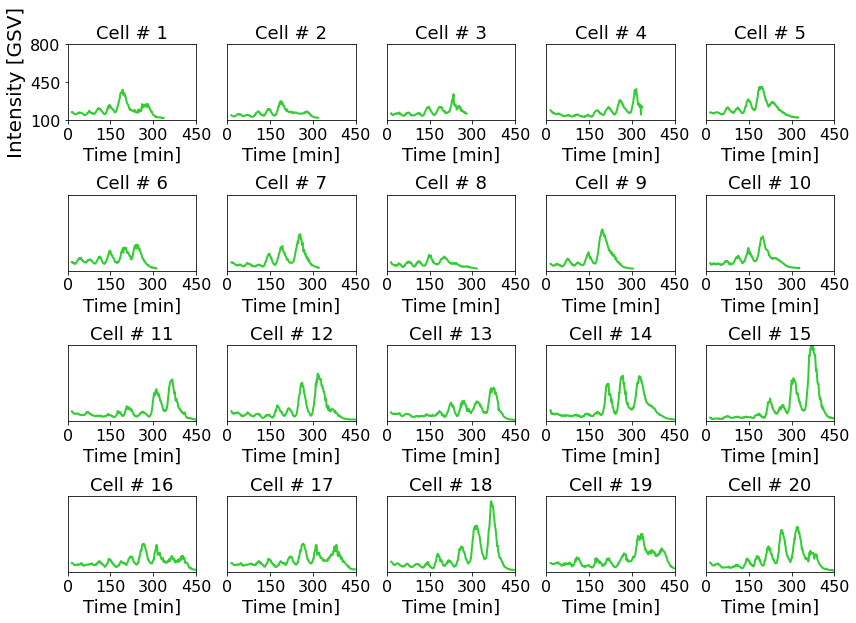

In [42]:
# Define the dimensions of the subplot
n_cols =  5
n_cells = len(TBtoSom_frames)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1
size_fig = n_rows*(10/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[12,size_fig])

for i in range(len(TBtoSom_frames)):
    
    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
    

    plt.plot(TBtoSom_frames[i], TBtoSom_traces[i], color='limegreen', linewidth=2)
    plt.title('Cell # %d'%(i+1), fontsize = 18)
    
    plt.xticks(np.arange(0,400,100), map(int,np.arange(0,400,100)*tr_min), fontsize=16)
    plt.xlabel('Time [min]', fontsize=18)
    if i ==0:
        plt.yticks(np.arange(100,950,350), fontsize=16)
        plt.ylabel('Intensity [GSV]', fontsize=20)
    else:
        plt.yticks([])
    plt.xlim([0,300])
    plt.ylim([100,800])

plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S1/Results/TB-Som-allcells.pdf', bbox_inches='tight')

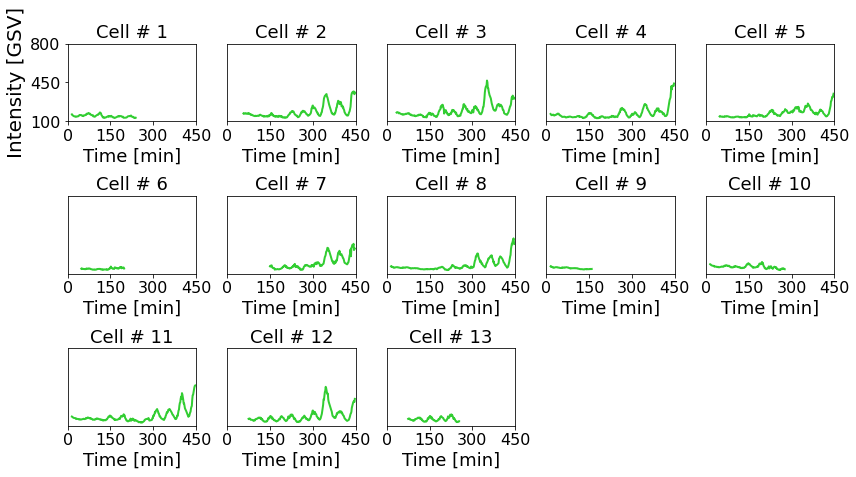

In [43]:
# Define the dimensions of the subplot
n_cols =  5
n_cells = len(TBtoPSMd_frames)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1
size_fig = n_rows*(10/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[12,size_fig])

short_trace_cells = np.array([3,5,9])
count = 0

for i in range(len(TBtoPSMd_frames)):
    
    if all(i != short_trace_cells):
        # Update the number of subplots    
        ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
        plot_num += 1


        plt.plot(TBtoPSMd_frames[i], TBtoPSMd_traces[i], color='limegreen', linewidth=2)
        plt.title('Cell # %d'%(count+1), fontsize = 18)
        count+=1 
        plt.xticks(np.arange(0,400,100), map(int,np.arange(0,400,100)*tr_min), fontsize=16)
        plt.xlabel('Time [min]', fontsize=18)
        if i ==0:
            plt.yticks(np.arange(100,950,350), fontsize=16)
            plt.ylabel('Intensity [GSV]', fontsize=20)
        else:
            plt.yticks([])
        plt.xlim([0,300])
        plt.ylim([100,800])

plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S1/Results/TB-PSM4-allcells.pdf', bbox_inches='tight')

### Organize the tracks according to time and perform peak detection

Obtain the period and the amplitude for each cycle in order to compare the cells according to how long have they spent time in the TB.

In [223]:
# Peak detection parameters (TB)

# Threshold
th_val = 0 # For maxima
th_val_ = 0 # For minima

# Prominence
prominence_val = 2 # For maxima
prominence_val_ = 2 # For minima

# Width
width_val = 4 # For maxima
width_val_ = 2 # For minima

# Distance
dist_val = 2 # For maxima
dist_val_ = 1 # For minima

# Averaging window size
window = 8

# If you want ts and as analysis: 'ts_as', ow no_ts_as
analysis = 'no_ts_as'

### TB-TB

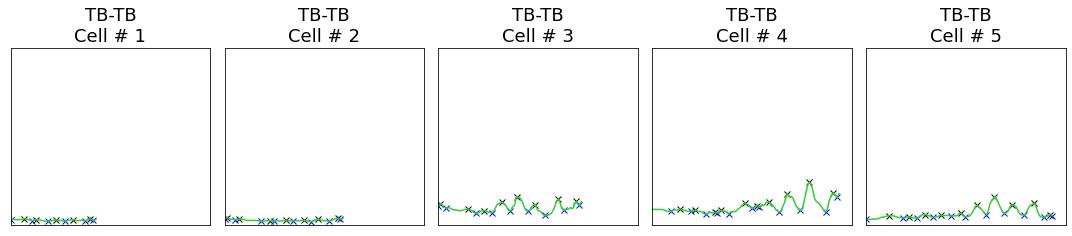

In [224]:
# Align using their temporal position

labels = ['TBtoTB', 'TBtoTB', 'TBtoPSMd']
periods_TBtoTB = []
amplitudes_TBtoTB = []

n_cols =  5
n_cells = len(TBtoTB_frames)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1
size_fig = n_rows*(15/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[15,size_fig])


n_cells = len(TBtoTB_frames)

    
for i in range(n_cells):

    tracks_save = np.ones(fts.n_frames+1)*np.nan
    
    # Add the tracked spot to the specific time frame to which it corresponds
    for j,val in enumerate(TBtoTB_frames[i]):
            tracks_save[val] = TBtoTB_traces[i][j]
    
    # Peak detection of the aligned data
    
    peaks = peak_detection(tracks_save[~np.isnan(tracks_save)], window, th_val, th_val_, \
                           dist_val, dist_val_, prominence_val,prominence_val_, width_val, width_val_, analysis)

    if np.size(peaks.peaks)>0:
        # If no peaks are detected, print the cell number
        if peaks.count > 0 :
            print(j+1)

        # Correct for the last peak in case it was not detected:
        y = smoothing_filter(tracks_save[~np.isnan(tracks_save)], window)

        # Add a minimum in the first position of the trace (first position after the last maximum which is not a nan) in case there is no minima
        if np.isnan(y[peaks.peaks_][0]):
            peaks.peaks_[0] =  np.where(np.isnan(y))[0][-1]+1

    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
    
    plt.plot(peaks.peaks, y[peaks.peaks], "xk"); plt.plot(peaks.peaks_, y[peaks.peaks_], "xb"); plt.plot(y, color='limegreen');
    plt.xticks([])
    plt.yticks([])
    plt.title('TB-TB\nCell # %d'%(i+1), fontsize = 18)
    plt.xlim([0,300])
    plt.ylim([100,800])
    # Save the period and amplitude for each 
    periods_TBtoTB.append(np.diff(peaks.peaks))
    amplitudes_TBtoTB.append(y[peaks.peaks])
    
plt.tight_layout()
plt.show()

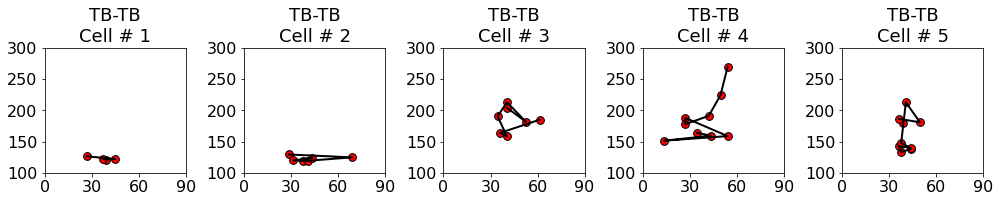

In [225]:
n_cols =  5
n_cells = len(TBtoTB_frames)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1
size_fig = n_rows*(12/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[14,size_fig])


for i in range(n_cells):
    
    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
        
    plt.scatter(periods_TBtoTB[i], amplitudes_TBtoTB[i][:-1], color='red', edgecolor='k', s=60)
    plt.plot(periods_TBtoTB[i], amplitudes_TBtoTB[i][:-1], color='black', linewidth=2)
    plt.title('TB-TB\nCell # %d'%(i+1), fontsize = 18)
    plt.tight_layout()
    plt.xlim([0,50])
    plt.ylim([100,300])
    plt.xticks(np.arange(0,80,20), map(int,np.arange(0,80,20)*tr_min), fontsize=16)
    plt.yticks(fontsize=16)
    
plt.tight_layout()
plt.show()

### TB-Som

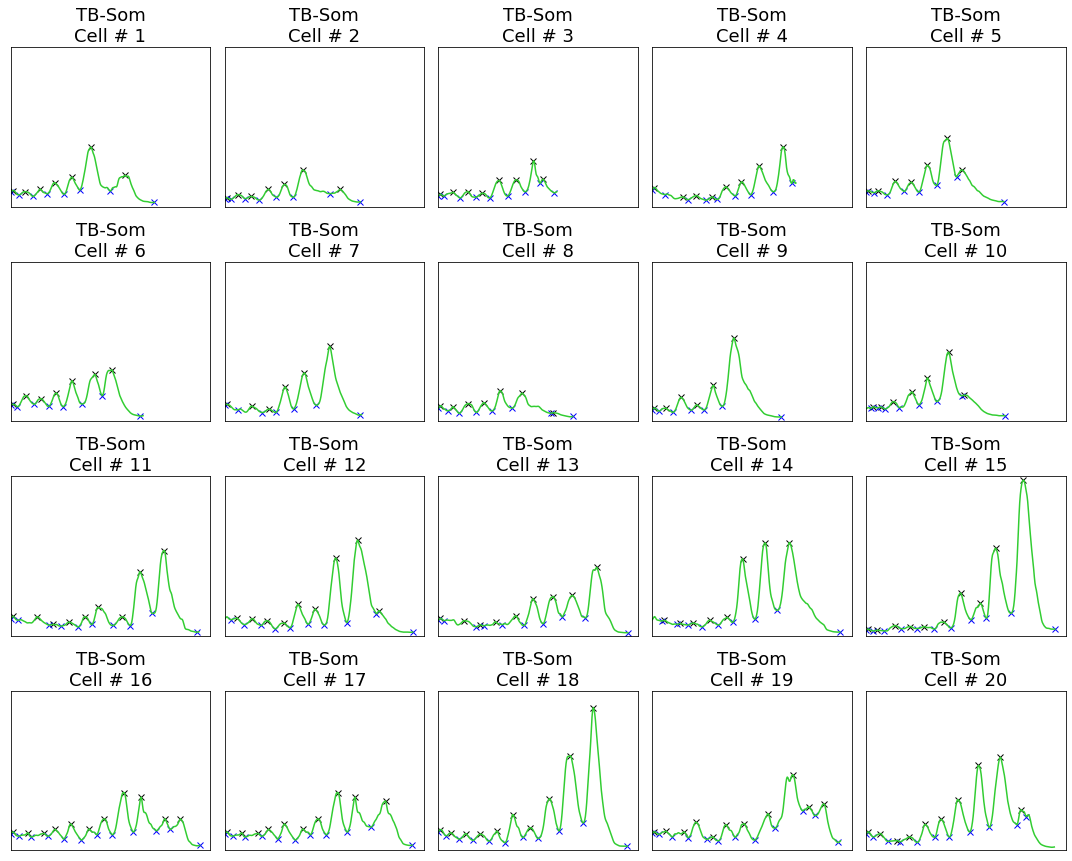

In [226]:
# Align using their temporal position

labels = ['TBtoSom', 'TBtoSom', 'TBtoPSMd']
periods_TBtoSom = []
amplitudes_TBtoSom = []

n_cols =  5
n_cells = len(TBtoSom_frames)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1
size_fig = n_rows*(15/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[15,size_fig])


n_cells = len(TBtoSom_frames)

    
for i in range(n_cells):

    tracks_save = np.ones(fts.n_frames+1)*np.nan
    
    # Add the tracked spot to the specific time frame to which it corresponds
    for j,val in enumerate(TBtoSom_frames[i]):
            tracks_save[val] = TBtoSom_traces[i][j]
    
    # Peak detection of the aligned data
    
    peaks = peak_detection(tracks_save[~np.isnan(tracks_save)], window, th_val, th_val_, \
                           dist_val, dist_val_, prominence_val,prominence_val_, width_val, width_val_, analysis)

    if np.size(peaks.peaks)>0:
        # If no peaks are detected, print the cell number
        if peaks.count > 0 :
            print(j+1)

        # Correct for the last peak in case it was not detected:
        y = smoothing_filter(tracks_save[~np.isnan(tracks_save)], window)

        # Add a minimum in the first position of the trace (first position after the last maximum which is not a nan) in case there is no minima
        if np.isnan(y[peaks.peaks_][0]):
            peaks.peaks_[0] =  np.where(np.isnan(y))[0][-1]+1

    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
    
    plt.plot(peaks.peaks, y[peaks.peaks], "xk"); plt.plot(peaks.peaks_, y[peaks.peaks_], "xb"); plt.plot(y, color='limegreen');
    plt.xticks([])
    plt.yticks([])
    plt.title('TB-Som\nCell # %d'%(i+1), fontsize = 18)
    plt.xlim([0,300])
    plt.ylim([100,800])
    # Save the period and amplitude for each 
    periods_TBtoSom.append(np.diff(peaks.peaks))
    amplitudes_TBtoSom.append(y[peaks.peaks])
    
plt.tight_layout()
plt.show()

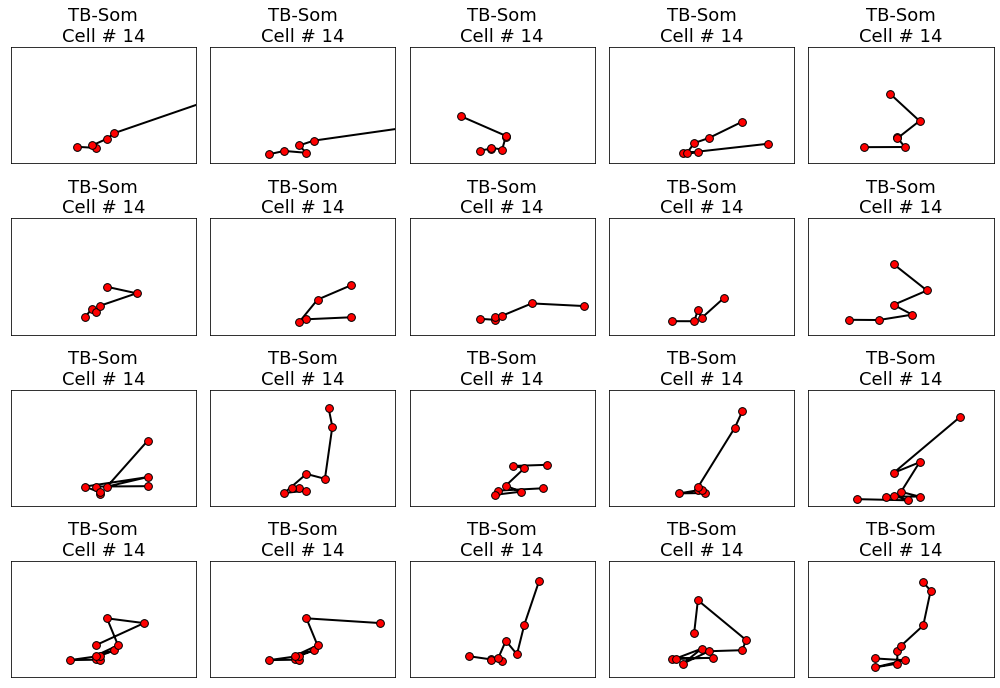

In [227]:
n_cols =  5
n_cells = len(TBtoSom_frames)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1
size_fig = n_rows*(12/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[14,size_fig])


for i in range(n_cells):
    
    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
        
    plt.plot(periods_TBtoSom[i], amplitudes_TBtoSom[i][:-1], color='black', linewidth=2,zorder=1)
    plt.scatter(periods_TBtoSom[i], amplitudes_TBtoSom[i][:-1], color='red', edgecolor='k', s=60,zorder=2)
    plt.title('TB-Som\nCell # %d'%(count+1), fontsize = 18)
    plt.tight_layout()
    plt.xlim([0,50])
    plt.ylim([100,600])
    plt.xticks([])
    plt.yticks([])
    plt.yticks(fontsize=16)
    
plt.tight_layout()
plt.show()

### TB-PSM4

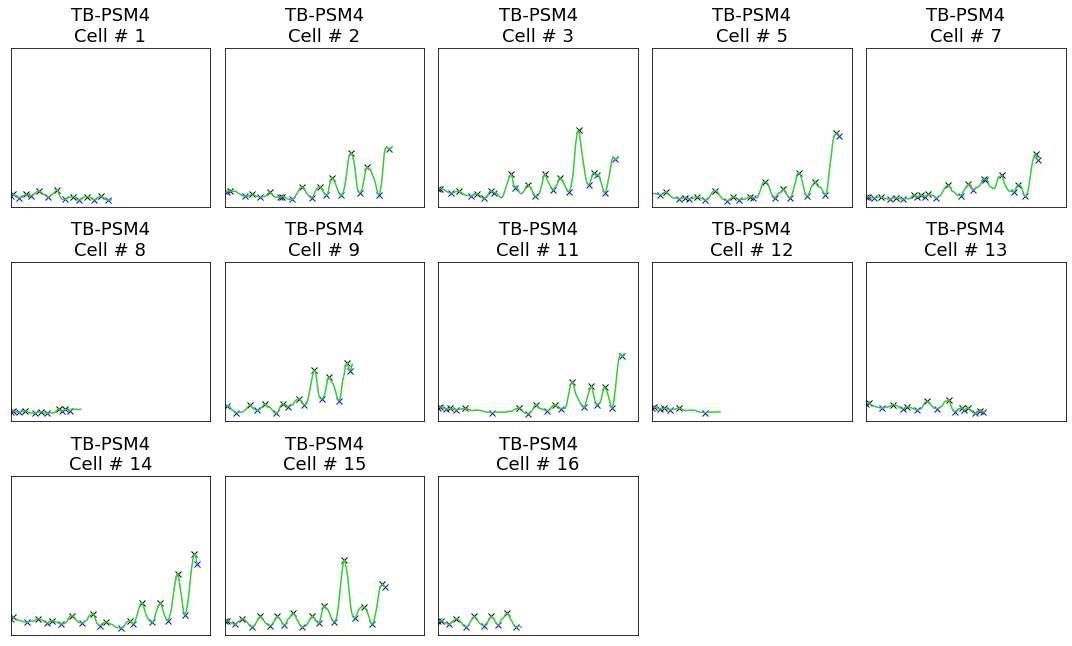

In [252]:
# Align using their temporal position

labels = ['TBtoPSMd', 'TBtoPSMd', 'TBtoPSMd']
periods_TBtoPSMd = []
amplitudes_TBtoPSMd = []

n_cols =  5
n_cells = len(TBtoPSMd_frames)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1
size_fig = n_rows*(15/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[15,size_fig])


n_cells = len(TBtoPSMd_frames)

    
for i in range(n_cells):
    
    if all(i != short_trace_cells):

        tracks_save = np.ones(fts.n_frames+1)*np.nan

        # Add the tracked spot to the specific time frame to which it corresponds
        for j,val in enumerate(TBtoPSMd_frames[i]):
                tracks_save[val] = TBtoPSMd_traces[i][j]

        # Peak detection of the aligned data

        peaks = peak_detection(tracks_save[~np.isnan(tracks_save)], window, th_val, th_val_, \
                               dist_val, dist_val_, prominence_val,prominence_val_, width_val, width_val_, analysis)

        if np.size(peaks.peaks)>0:
            # If no peaks are detected, print the cell number
            if peaks.count > 0 :
                print(j+1)

            # Correct for the last peak in case it was not detected:
            y = smoothing_filter(tracks_save[~np.isnan(tracks_save)], window)

            # Add a minimum in the first position of the trace (first position after the last maximum which is not a nan) in case there is no minima
            if np.isnan(y[peaks.peaks_][0]):
                peaks.peaks_[0] =  np.where(np.isnan(y))[0][-1]+1
        
        # Save the period and amplitude for each 
        periods_TBtoPSMd.append(np.diff(peaks.peaks))
        amplitudes_TBtoPSMd.append(y[peaks.peaks])
        
        # Update the number of subplots    
        ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
        plot_num += 1

        plt.plot(peaks.peaks, y[peaks.peaks], "xk"); plt.plot(peaks.peaks_, y[peaks.peaks_], "xb"); plt.plot(y, color='limegreen');
        plt.xticks([])
        plt.yticks([])
        plt.title('TB-PSM4\nCell # %d'%(i+1), fontsize = 18)
        plt.xlim([0,300])
        plt.ylim([100,800])
        
    
plt.tight_layout()
plt.show()

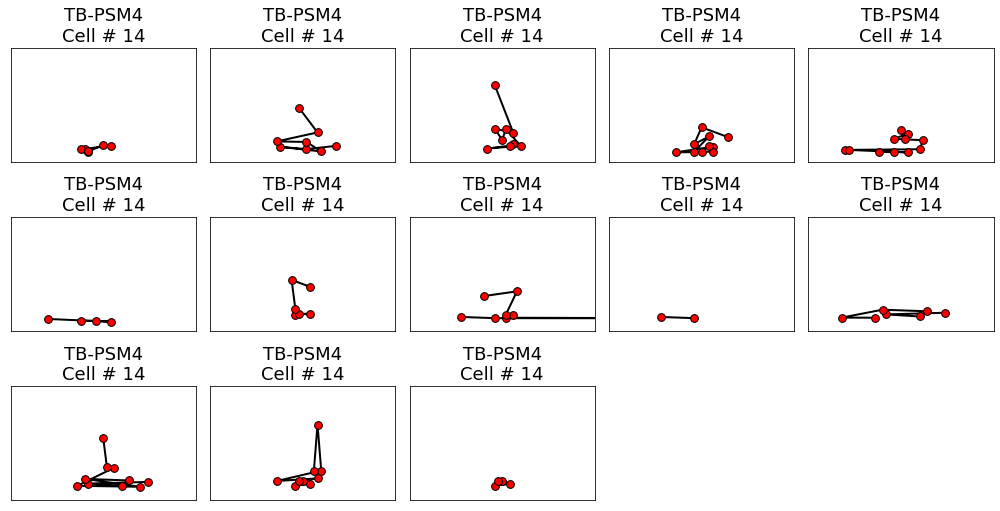

In [253]:
n_cols =  5
n_cells = len(TBtoPSMd_frames)-len(short_trace_cells)
n_rows = np.ceil((n_cells + 1) / n_cols)
plot_num = 1
size_fig = n_rows*(12/n_cols)
# Initialize the figure size
fig = plt.figure(figsize=[14,size_fig])


for i in range(n_cells):

    # Update the number of subplots    
    ax = plt.subplot(int(n_rows), n_cols, plot_num, aspect='auto')
    plot_num += 1
        
    plt.plot(periods_TBtoPSMd[i], amplitudes_TBtoPSMd[i][:-1], color='black', linewidth=2,zorder=1)
    plt.scatter(periods_TBtoPSMd[i], amplitudes_TBtoPSMd[i][:-1], color='red', edgecolor='k', s=60,zorder=2)
    plt.title('TB-PSM4\nCell # %d'%(count+1), fontsize = 18)
    plt.tight_layout()
    plt.xlim([0,50])
    plt.ylim([100,600])
    plt.xticks([])
    plt.yticks([])
    plt.yticks(fontsize=16)
    
plt.tight_layout()
plt.show()

## Bulk Analysis

In [254]:
# Align using their temporal position

labels = ['TBtoTB', 'TBtoSom', 'TBtoPSMd']
periods_Pos1 = []
amplitudes_Pos1 = []

for i in labels:
    data = eval('tracks_Pos1_%s'%i)
    
    # Fill the timepoints where there are no cells tracked with nan
    tracks_save = np.ones((data.n_tracks_divs, fts.n_frames+1))*np.nan
    
    ### Data alignment by time
    for k in range(data.n_tracks_divs):

        # Add the tracked spot to the specific time frame to which it corresponds
        for j,val in enumerate(data.spots_features['Frames'][k]):
            tracks_save[k,val] = data.spots_features['Mean1'][k][j]
    
    ### Peak detection of the aligned data
    
    periods_aux = []
    amplitudes_aux = []
    
    for j in range(len(tracks_save)):
        peaks = peak_detection(tracks_save[j][~np.isnan(tracks_save[j])], window, th_val, th_val_, \
                               dist_val, dist_val_, prominence_val,prominence_val_, width_val, width_val_, analysis)

        if np.size(peaks.peaks)>0:
            # If no peaks are detected, print the cell number
            if peaks.count > 0 :
                print(j+1)

            # Correct for the last peak in case it was not detected:
            y = smoothing_filter(tracks_save[j][~np.isnan(tracks_save[j])], window)

            # Add a minimum in the first position of the trace (first position after the last maximum which is not a nan) in case there is no minima
            if np.isnan(y[peaks.peaks_][0]):
                peaks.peaks_[0] =  np.where(np.isnan(y))[0][-1]+1

            periods_aux.append(np.diff(peaks.peaks))
            amplitudes_aux.append(y[peaks.peaks])
    
    # Save the period and amplitude for each 
    periods_Pos1.append(periods_aux)
    amplitudes_Pos1.append(amplitudes_aux)

<ipython-input-255-107a2e6c95a6>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[4,2])


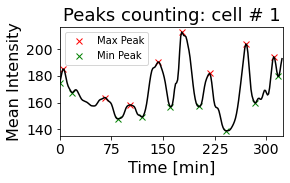

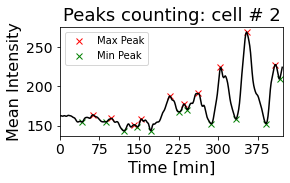

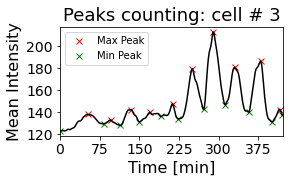

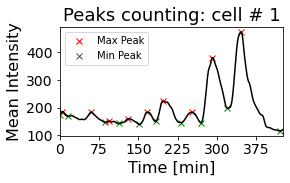

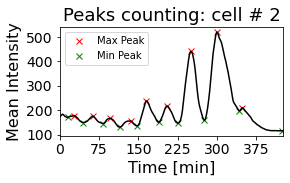

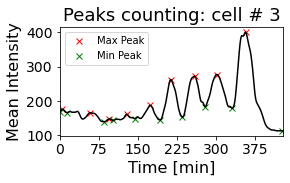

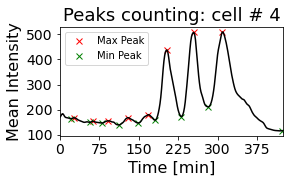

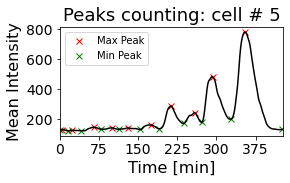

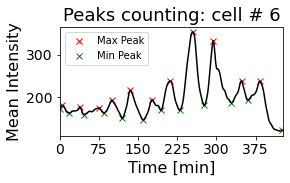

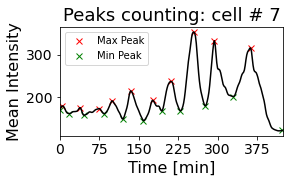

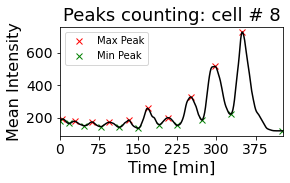

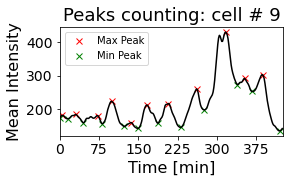

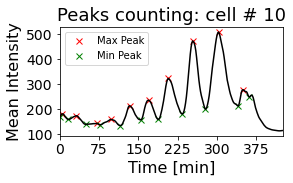

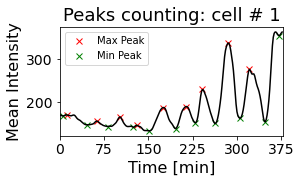

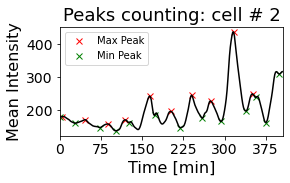

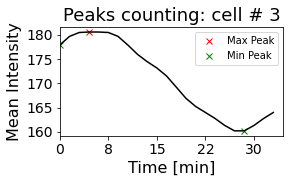

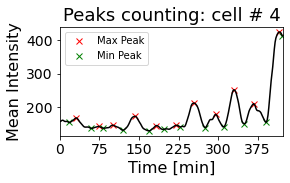

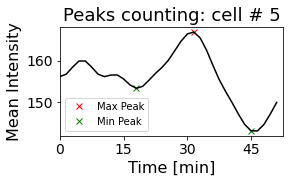

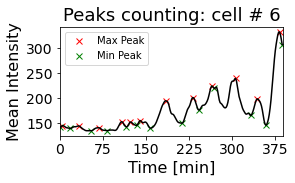

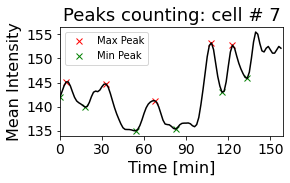

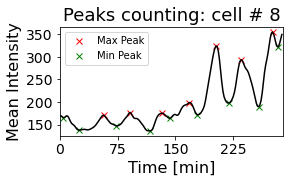

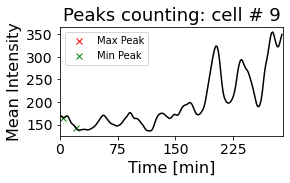

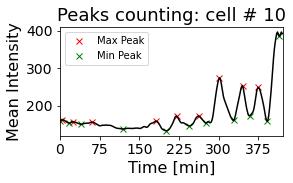

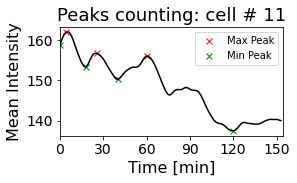

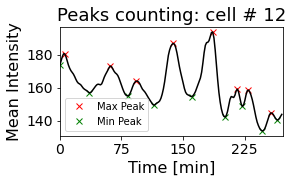

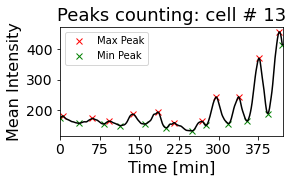

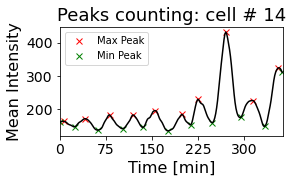

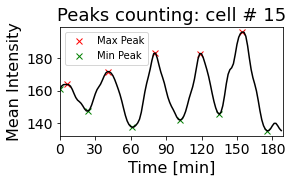

In [255]:
# Align using their temporal position

labels = ['TBtoTB', 'TBtoSom', 'TBtoPSMd']

periods_Pos2 = []
amplitudes_Pos2 = []

for i in labels:
    data = eval('tracks_Pos2_%s'%i)
    
    # Fill the timepoints where there are no cells tracked with nan
    tracks_save = np.ones((data.n_tracks_divs, fts.n_frames+1))*np.nan
    
    ### Data alignment by time
    for k in range(data.n_tracks_divs):

        # Add the tracked spot to the specific time frame to which it corresponds
        for j,val in enumerate(data.spots_features['Frames'][k]):
            tracks_save[k,val] = data.spots_features['Mean1'][k][j]
    
    ### Peak detection of the aligned data
    
    periods_aux = []
    amplitudes_aux = []
    
    for j in range(len(tracks_save)):
        
        plt.figure(figsize=[4,2])
        
        peaks = peak_detection(tracks_save[j][~np.isnan(tracks_save[j])], window, th_val, th_val_, \
                               dist_val, dist_val_, prominence_val,prominence_val_, width_val, width_val_, analysis)

        if np.size(peaks.peaks)>0:
            # If no peaks are detected, print the cell number
            if peaks.count > 0 :
                print(j+1)

            # Correct for the last peak in case it was not detected:
            y = smoothing_filter(tracks_save[j][~np.isnan(tracks_save[j])], window)

            # Add a minimum in the first position of the trace (first position after the last maximum which is not a nan) in case there is no minima
            if np.isnan(y[peaks.peaks_][0]):
                peaks.peaks_[0] =  np.where(np.isnan(y))[0][-1]+1

            periods_aux.append(np.diff(peaks.peaks))
            amplitudes_aux.append(y[peaks.peaks])
            
        plt.plot(peaks.peaks, y[peaks.peaks], "xr", label='Max Peak'); plt.plot(peaks.peaks_, y[peaks.peaks_], "xg", label='Min Peak'); plt.plot(y, color='black'); plt.legend()
        plt.title('Peaks counting: cell # %d'%(j+1), fontsize = 18)
        plt.xlabel('Time [min]', fontsize=16)
        locs, labels = plt.xticks()
        plt.xticks(locs, map(int,np.round(locs*tr_min)), fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylabel('Mean Intensity', fontsize=16)
        plt.xlim([0,len(y)])
    
    # Save the period and amplitude for each 
    periods_Pos2.append(periods_aux)
    amplitudes_Pos2.append(amplitudes_aux)

### Plot the results of period vs amplitude for each tracking location

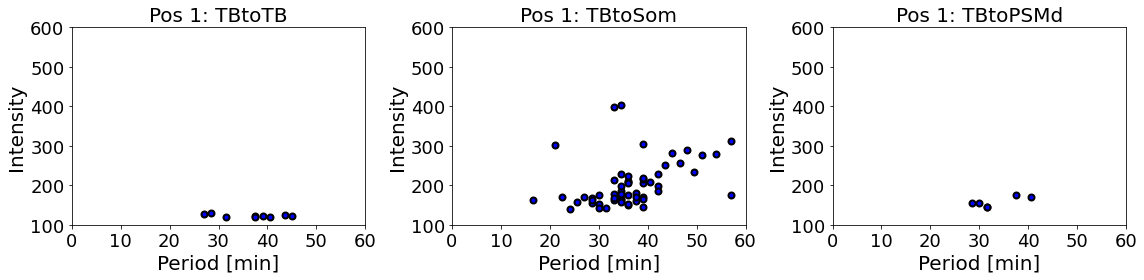

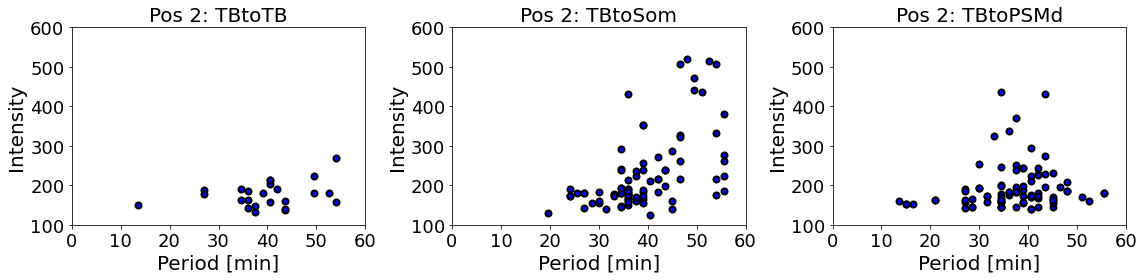

In [256]:
# Position 1
labels = ['TBtoTB', 'TBtoSom', 'TBtoPSMd']

plt.figure(figsize=[16,4])
for j in range(len(labels)):
    
    plt.subplot(1,3,j+1)
    
    periods = periods_Pos1[j]
    amplitudes = amplitudes_Pos1[j]
    
    for i in range(len(periods)):
        plt.scatter(periods[i]*tr_min, amplitudes[i][:-1], color='blue', edgecolor='black', linewidth=2)
        
    plt.xlabel('Period [min]', fontsize=20)
    plt.ylabel('Intensity', fontsize=20)
    plt.title('Pos 1: %s'%labels[j], fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim([100, 600])
    plt.xlim([0,60])
    
plt.tight_layout()
plt.show()

# Position 2
plt.figure(figsize=[16,4])
for j in range(len(labels)):
    
    plt.subplot(1,3,j+1)
    
    periods = periods_Pos2[j]
    amplitudes = amplitudes_Pos2[j]
    
    for i in range(len(periods)):
        plt.scatter(periods[i]*tr_min, amplitudes[i][:-1], color='blue', edgecolor='black', linewidth=2)
        
    plt.xlabel('Period [min]', fontsize=20)
    plt.ylabel('Intensity', fontsize=20)
    plt.title('Pos 2: %s'%labels[j], fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim([100, 600])
    plt.xlim([0,60])
    
plt.tight_layout()
plt.show()

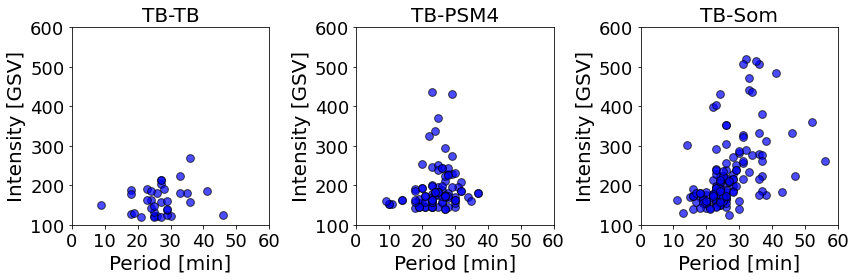

In [258]:
fig = plt.figure(figsize=[12,4])

plt.subplot(131)
n_cells = len(TBtoTB_traces)

for i in range(n_cells):
    plt.scatter(periods_TBtoTB[i], amplitudes_TBtoTB[i][:-1], s=60, color='blue', edgecolor='k',alpha=0.7)
    
plt.xlabel('Period [min]', fontsize=20)
plt.ylabel('Intensity [GSV]', fontsize=20)
plt.title('TB-TB', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([100, 600])
plt.xlim([0,60])

plt.subplot(132)
n_cells = len(TBtoPSMd_traces)-len(short_trace_cells)

for i in range(n_cells):
    plt.scatter(periods_TBtoPSMd[i], amplitudes_TBtoPSMd[i][:-1], s=60, color='blue', edgecolor='k',alpha=0.7)
    
plt.xlabel('Period [min]', fontsize=20)
plt.ylabel('Intensity [GSV]', fontsize=20)
plt.title('TB-PSM4', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([100, 600])
plt.xlim([0,60])

plt.subplot(133)
n_cells = len(TBtoSom_traces)

for i in range(n_cells):
    plt.scatter(periods_TBtoSom[i], amplitudes_TBtoSom[i][:-1], s=60, color='blue', edgecolor='k',alpha=0.7)
    
plt.xlabel('Period [min]', fontsize=20)
plt.ylabel('Intensity [GSV]', fontsize=20)
plt.title('TB-Som', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([100, 600])
plt.xlim([0,60])

plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S1/Results/PeriodsAmps-allcells.pdf', bbox_inches='tight')

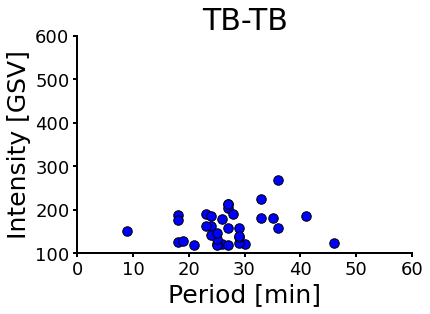

In [278]:
fig = plt.figure(figsize=[6,4])

n_cells = len(TBtoTB_traces)

for i in range(n_cells):
    plt.scatter(periods_TBtoTB[i], amplitudes_TBtoTB[i][:-1], s=90, color='blue', edgecolor='k',alpha=1)
    
plt.xlabel('Period [min]', fontsize=25)
plt.ylabel('Intensity [GSV]', fontsize=25)
plt.title('TB-TB', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([100, 600])
plt.xlim([0,60])
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


fig.savefig('../Data/Figure S1/Results/PeriodsAmps-TBtoTB.pdf', bbox_inches='tight')

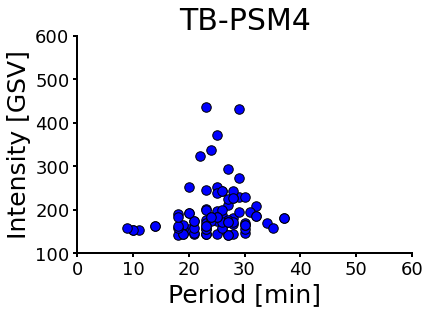

In [277]:
fig = plt.figure(figsize=[6,4])

n_cells = len(TBtoPSMd_traces)-len(short_trace_cells)

for i in range(n_cells):
    plt.scatter(periods_TBtoPSMd[i], amplitudes_TBtoPSMd[i][:-1], s=90, color='blue', edgecolor='k',alpha=1)
    
plt.xlabel('Period [min]', fontsize=25)
plt.ylabel('Intensity [GSV]', fontsize=25)
plt.title('TB-PSM4', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([100, 600])
plt.xlim([0,60])
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


fig.savefig('../Data/Figure S1/Results/PeriodsAmps-TBtoPSMd.pdf', bbox_inches='tight')

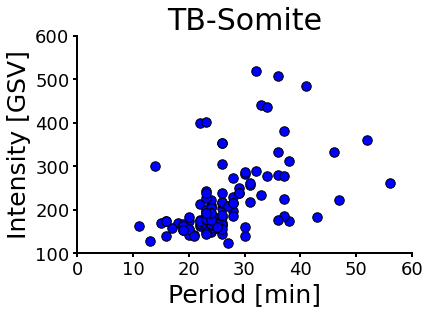

In [276]:
fig = plt.figure(figsize=[6,4])

n_cells = len(TBtoSom_traces)-len(short_trace_cells)

for i in range(n_cells):
    plt.scatter(periods_TBtoSom[i], amplitudes_TBtoSom[i][:-1], s=90, color='blue', edgecolor='k',alpha=1)
    
plt.xlabel('Period [min]', fontsize=25)
plt.ylabel('Intensity [GSV]', fontsize=25)
plt.title('TB-Somite', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([100, 600])
plt.xlim([0,60])
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


fig.savefig('../Data/Figure S1/Results/PeriodsAmps-TBtoSom.pdf', bbox_inches='tight')

## Number of Cycles & Period by cycle

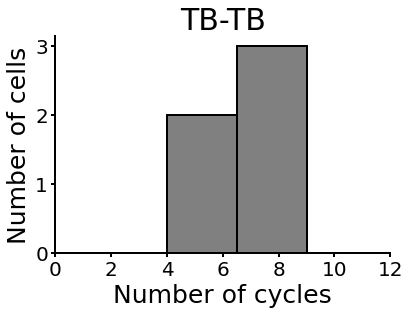

In [261]:
fig = plt.figure(figsize=[6,4])
max_n_cycles = 0

n_cells = len(TBtoTB_traces)
n_cycles = []

for i in range(n_cells):
    if len(periods_TBtoTB[i])>max_n_cycles:
        max_n_cycles = len(periods_TBtoTB[i])
        
    n_cycles.append(len(periods_TBtoTB[i]))
        
plt.hist(n_cycles, bins='fd', color='grey',edgecolor='k', linewidth=2)
plt.xticks(np.arange(0,13,2), fontsize=20)
plt.xlabel('Number of cycles', fontsize=25)
plt.yticks(np.arange(0,4,1), fontsize=20)
plt.ylabel('Number of cells', fontsize=25)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


plt.title('TB-TB', fontsize=30)
plt.show()

fig.savefig('../Data/Figure S1/Results/PeaksTBtoTB.pdf', bbox_inches='tight')

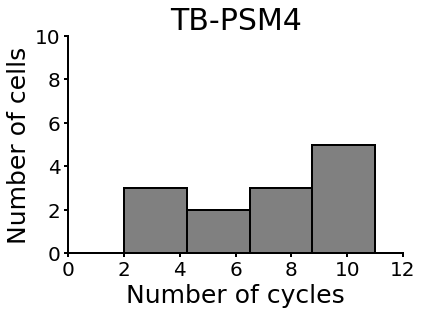

In [263]:
fig = plt.figure(figsize=[6,4])
max_n_cycles = 0

n_cells = len(TBtoPSMd_traces)-len(short_trace_cells)
n_cycles = []

for i in range(n_cells):
    if len(periods_TBtoPSMd[i])>max_n_cycles:
        max_n_cycles = len(periods_TBtoPSMd[i])
        
    n_cycles.append(len(periods_TBtoPSMd[i]))
        
plt.hist(n_cycles, bins='fd', color='grey',edgecolor='k', linewidth=2)
plt.xticks(np.arange(0,13,2), fontsize=20)
plt.xlabel('Number of cycles', fontsize=25)
plt.yticks(np.arange(0,12,2), fontsize=20)
plt.ylabel('Number of cells', fontsize=25)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


plt.title('TB-PSM4', fontsize=30)
plt.show()


fig.savefig('../Data/Figure S1/Results/PeaksTBtoPSMd.pdf', bbox_inches='tight')

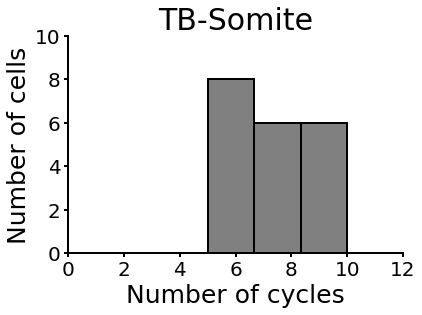

In [264]:
fig = plt.figure(figsize=[6,4])
max_n_cycles = 0

n_cells = len(TBtoSom_traces)
n_cycles = []

for i in range(n_cells):
    if len(periods_TBtoSom[i])>max_n_cycles:
        max_n_cycles = len(periods_TBtoSom[i])
        
    n_cycles.append(len(periods_TBtoSom[i]))
        
plt.hist(n_cycles, bins='fd', color='grey',edgecolor='k', linewidth=2)
plt.xticks(np.arange(0,13,2), fontsize=20)
plt.xlabel('Number of cycles', fontsize=25)
plt.yticks(np.arange(0,12,2), fontsize=20)
plt.ylabel('Number of cells', fontsize=25)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


plt.title('TB-Somite', fontsize=30)
plt.show()


fig.savefig('../Data/Figure S1/Results/PeaksTBtoSom.pdf', bbox_inches='tight')